## Algorithmique - Précision des algorithmes
### Détermination du flou dans une série d'images

La photographie numérique s’est considérablement développée dans tous les secteurs : celui des particuliers bien évidemment, chacun étant équipé aujourd’hui d’un appareil photo inclus dans son téléphone portable. Mais dans les domaines industriels et scientifiques également, dans lesquels les prises de vue sont pléthore : surveillance d’installations industrielles, caméras thermiques, détection de pièces défectueuses sur une ligne de production, satellites militaires, satellites météo, etc. Ainsi, on se rappelle que le téléscope spatial Hubble, à cause d’un problème de lentille, a renvoyé pendant de nombreux mois des images floues (voir figure cidi-dessous) qui ont nécessité un post-traitement.

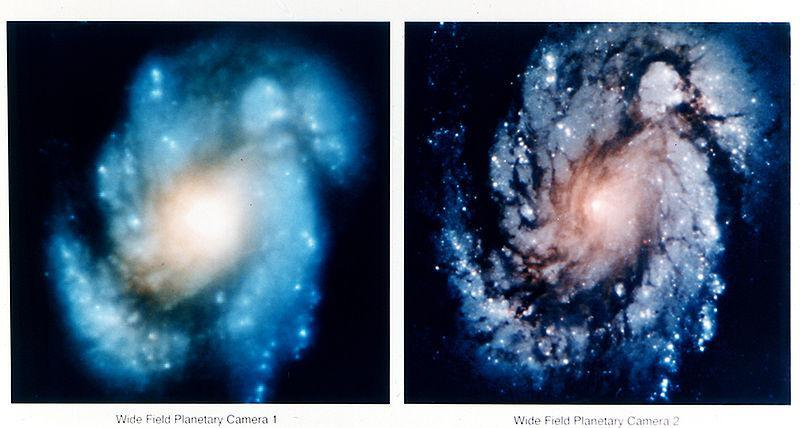

Figure 1 – À gauche, photo floue prise par Hubble. À droite, l’image après correction du flou.

Rien que pour les particuliers, on estime à 1200 milliards 1 le nombre de photographies numériques prises par les humains à l’aide de leur smartphone en 2017 ! Parmi ces photographies, certaines sont « floues » ou « manquent de netteté ». Certaines, « très floues », peuvent être détectées par l’oeil humain. Pour d’autres, « moins floues », c’est beaucoup plus difficile : « floue », « nette », « moins floue », « plus nette » sont des observations qualitatives.

L’objectif du travail qui vous est proposé est de quantifier la netteté d’une image. On pourra ainsi envisager d’automatiser la détection de flou sur de grands ensembles d’images et éviter un travail fastidieux, et parfois impossible, pour l’oeil humain.

Sur une image floue, chaque pixel est « proche » de la moyenne des pixels adjacents. Le sujet propose d'expérimenter plusieurs algorithmes de calcul de proximité pour évaluer automatiquement la netteté d’une image.

Les photos que nous étudierons, présentes dans le sous-répertoire photos, sont représentées sur la figure ci-dessous.

| Month | Savings | popo |
| -------- | ------- |------- |
|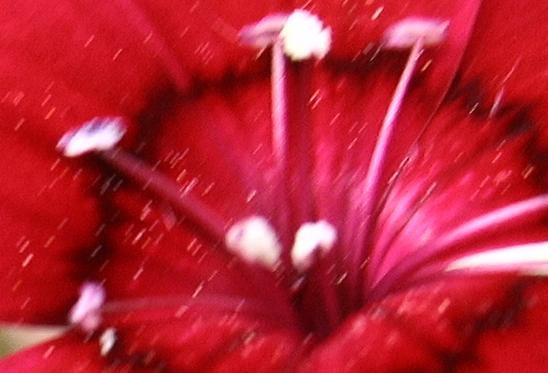 | 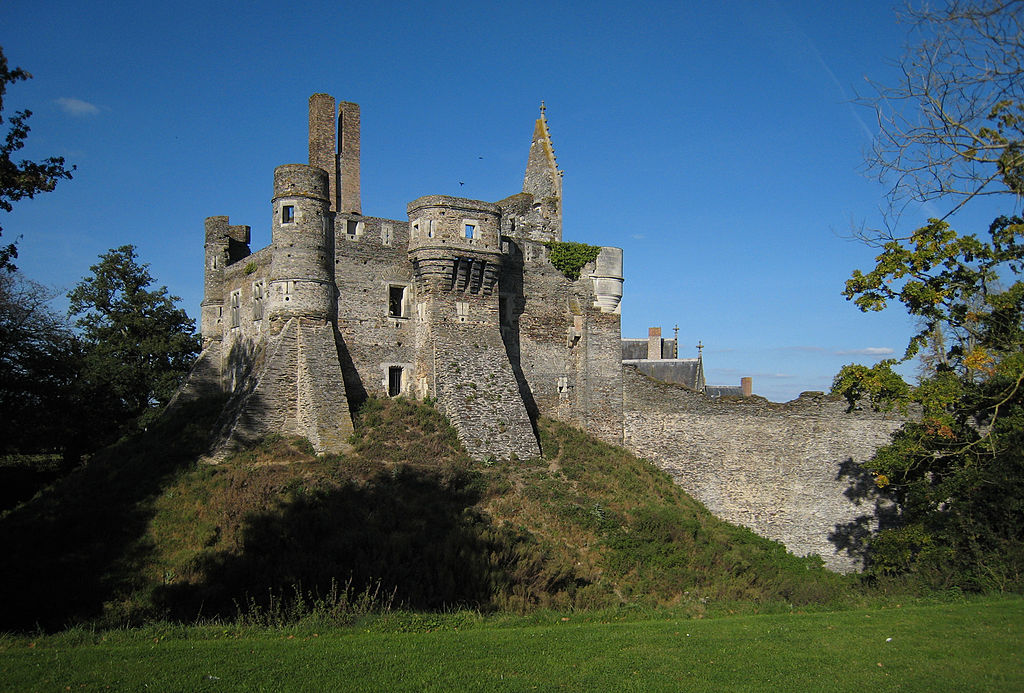 | 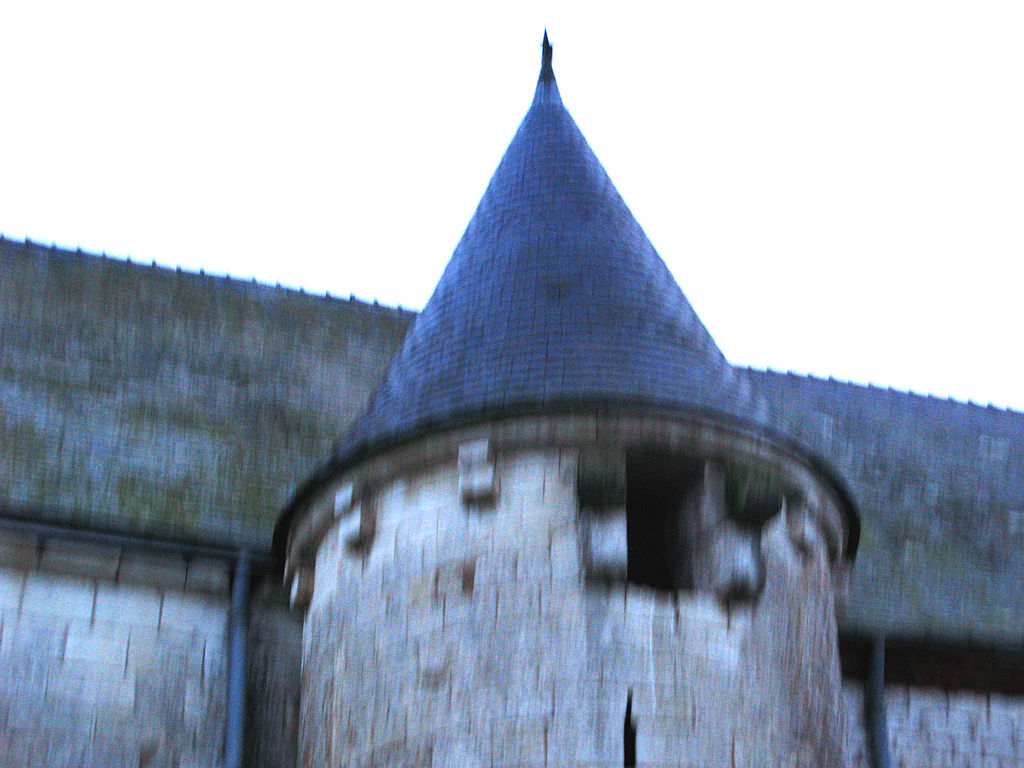|
| photo_0.jpg | photo_1.jpg | photo_2.jpg |
| 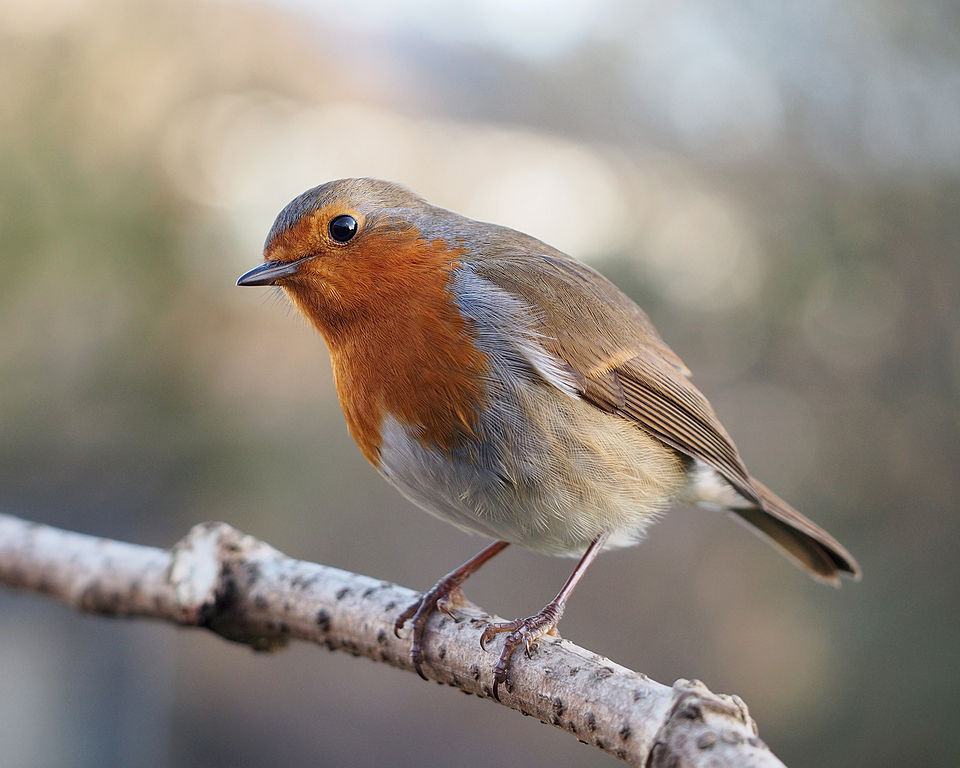| 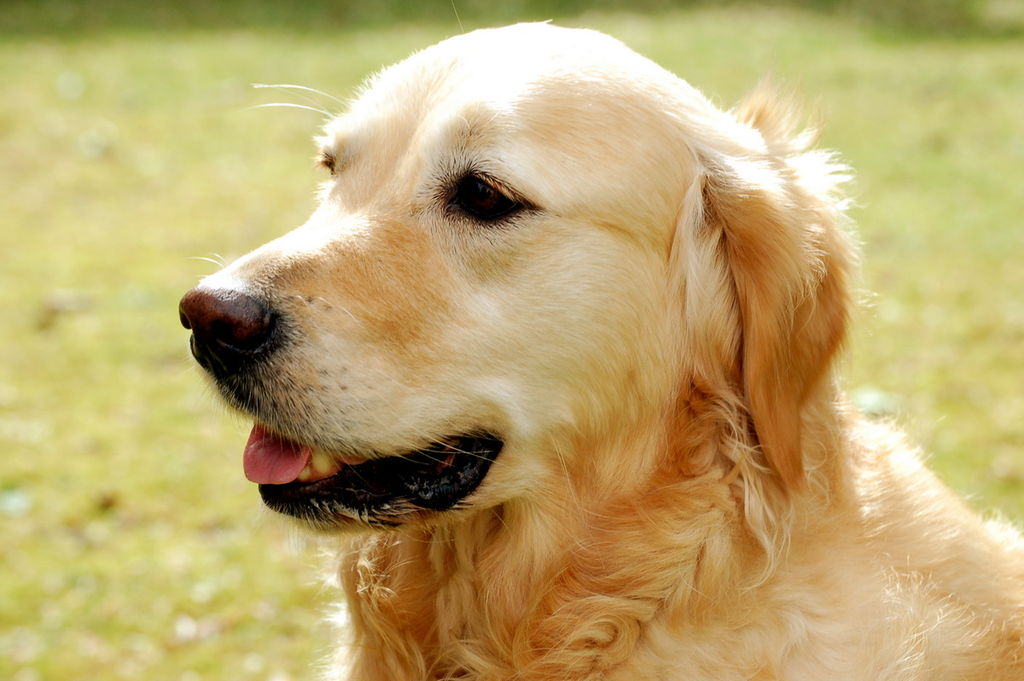|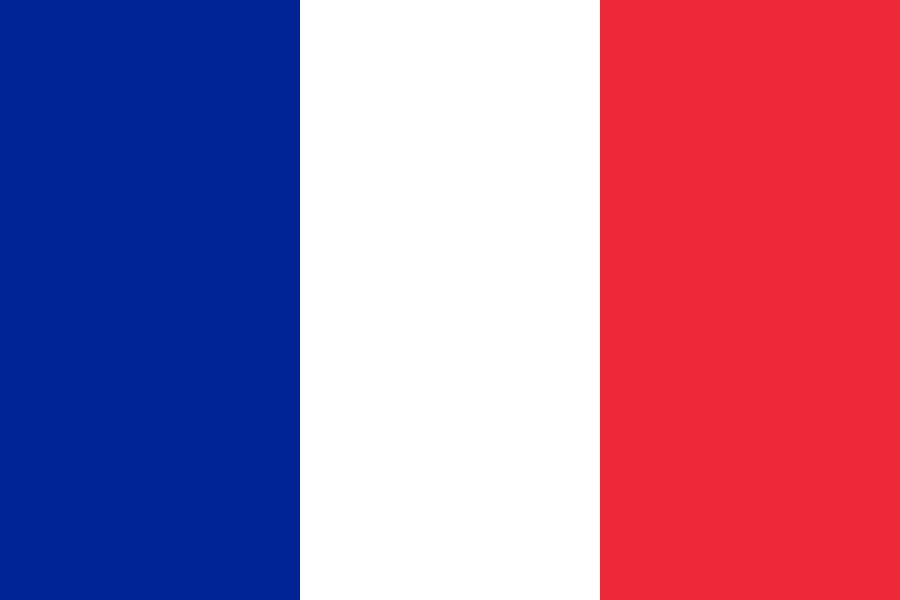|
| photo_3.jpg | photo_4.jpg | photo_5.jpg |

In [ ]:
# chargement des modules nécessaires dans ce notebook
import matplotlib.pyplot as plt
import numpy as np

## Travail péliminaire : chargement des images

### Question 1.
Créer une liste `L_critere_oeil` telle que `L_critere_oeil[i]` soit égal à "floue" ou à "nette" selon que l’image n°i vous semble floue ou pas. Afficher la liste `L_qualite`.

In [ ]:
# Réponse 1. Code python attendu.

### Question 2.
* Décrire brièvement les caractéristiques du format d’image des photos de la figure 1.
* Pour quel type d’images est-il particulièrement adapté ?

### Réponse 2.
Compléter votre réponse ci-dessous (sous forme de texte, pas de code)

### Question 3.
Commenter chaque ligne du code suivant pour expliquer ce qu’il fait :

In [ ]:
def importe_image(fichier):
    return plt.imread(fichier)
image = importe_image('photos/photo_0.jpg')
hauteur,largeur = image.shape[0],image.shape[1]
print(image[50][100])
print(hauteur, largeur)
plt.imshow(image)
plt.show()

### Question 4.
* Quelle est la taille de la première image `photo_0.jpg` de la figure 1 ?
* Sachant que chaque pixel est stocké comme un triplet d’entiers compris entre 0 et 255, sur combien d’octets est stocké un pixel ?
* Calculer la taille $t$ (exprimée en octets) de l’image en fonction de sa hauteur $h$ et de sa largeur $l$.
* Faire l’application numérique pour la matrice python correspondant à l’image `photo_0.jpg`.
* Comparer avec la taille en octets affichée par le système d’exploitation en précisant la différence en pourcentage.
* Quelles caractéristiques du format JPG permettent d’expliquer cette différence ?

### Réponse 4.
Compléter votre réponse ci-dessous, sous forme de texte (pas de code attendu).
* x
* x
* x
* x
* x
* x

### Question 5.
En pratique, il est plus commode de stocker chaque composante d’un pixel sous forme de réels. Pour cela, on modifie la fonction `importe_image` utilisée précédemment :

In [ ]:
def importe_image(fichier):
    image = plt.imread(fichier)
    return image/255

Chaque pixel est alors un triplet de nombres réels compris entre `0.` et `1.` représentés par des flottants simple précision.
* Quelle est la taille (exprimée en octets) occupée alors par chaque pixel ?
* Calculer la taille (exprimée en octets) de l’image en fonction de la hauteur h et de la largeur l.
* Faire l’application numérique pour la même image que précédemment et expliquer la différence observée.

### Réponse 5.
* x
* x
* x

### Question 6.
En utilisant la liste `L_noms_fichiers` des fichiers du dossier `./photos` ainsi que la fonction `importe_image`, créer la liste `L_images` qui contient les 6 images.



In [ ]:
L_noms_fichiers = ['photos/photo_0.jpg', 'photos/photo_1.jpg',
                   'photos/photo_2.jpg', 'photos/photo_3.jpg',
                   'photos/photo_4.jpg', 'photos/photo_5.jpg']

# Réponse 6. Votre code ci-dessous.

## Algorithme de conversion en niveaux de gris

Pour convertir un pixel couleur de (R, V, B) (triplet de flottants) en un pixel gris G (un flottant), on va utiliser ici la formule

$G = (R + V + B) / 3$

c'est-à-dire que la quantité de gris est obtenue comme la moyenne des quantités de $R$, de $V$ et de $B$.

On rappelle que la fonction permettant de créer un tableaux de 0 possédant $n$ lignes et $m$ colonnes est:
```python
np.zeros((n, m))
```

### Question 7.
Écrire une fonction `niveaux_gris(image)` qui prend en argument une image et renvoie l’image correspondante convertie en niveaux de gris. L'image en niveaux de gris sera initialisée comme un tableau de $0$ possédant le même nombre de lignes et de colonnes que l'image originale.

In [ ]:
# réponse 6, code python
def niveaux_gris(image):
    n, m, p = image.shape  # récupère les dimensions de l'image et la profondeur (
    image_gris = np.zeros((n, m))

    # Votre code à copléter ici
    
    return image_gris

### Question 7.
Convertir toutes les images de `L_images` en niveaux de gris puis vérifier que le code suivant affiche la
première image correctement :
```python
plt.imshow(L_images[0], cmap="gray")
plt.show()
```
Remarque : pour économiser de l'espace en mémoire, vous remplacerez dans la liste `L_images` chaque image en couleur par sa version en niveaux de gris.

In [ ]:
# Réponse 7. Votre code ici

In [ ]:
plt.imshow(L_images[0], cmap="gray")
plt.show()

## Algorithme de détection du flou par la moyenne des pixels adjacents
Pour pouvoir évaluer si une image est floue ou pas, on va comparer le pixel $(i, j)$ à la moyenne des pixels adjacents de coordonnées $(i − 1, j)$, $(i + 1, j)$, $(i, j − 1)$ et $(i, j + 1)$ grisés sur le schéma suivant :

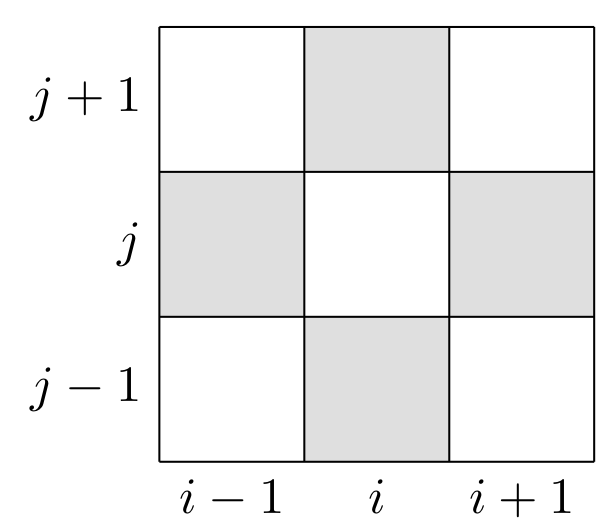

Pour des raisons techniques, on multiplie la différence entre un pixel et la moyenne de ses voisins par 4 (c’est la matrice du laplacien).

### Question 8
Q11. Écrire une fonction laplacien(image) qui renvoie une nouvelle matrice telle que:

$matrice[i, j] = 4 (image[i, j] − moyenne)$

avec

$moyenne = \frac{image[i−1, j] + image[i+1, j] + image[i, j − 1] + image[i, j + 1]}{4}$

La matrice aura même taille que l’image à traiter et les pixels du bord seront tous nuls.

In [ ]:
# Compléter le code ci-dessous

def laplacien(image):
    # Compléter la fonction
    return matrice

### Question 9. Critère du maximum
* Écrire une fonction `maximum(matrice)` qui prend en argument une matrice et renvoie le maximum de la valeur absolue de ses coefficients.
* Faire l'application avec L_images[0] première image de la liste en N&B
* Comparer le résultat avec `np.max(np.abs(matrice))` pour la matrice du laplacien de la première image, vérifier que vous trouvez bien la même chose. Pour cette question, vous importerez au préalable le package `numpy` avec l'instruction suivante :
```python
import numpy as np
````

In [ ]:
# Votre code ici

### Question 10.
Combien de comparaisons $n_{comp}$ est-ce que la fonction maximum(matrice) effectue ? On donnera le résultat en fonction du nombre de lignes $n$ et du nombre de colonnes $m$.

### Réponse 10.
Sous forme de texte, pas de code attendu.

### Question 11.
Dans le pire et dans le meilleur cas, combien d’affectations est-ce que la fonction `maximum(matrice)` effectue ? On donnera le résultat en terme du nombre de lignes $n$ et du nombre de colonnes $m$.


### Réponse 11
Votre réponse ci-dessous, pas de code attendu.

### Question 11. Critère du maximum pour la détermination de la netteté d'une image
On choisit comme critère de netteté le fait que `maximum(laplacien(image)) > 1`, c'est-à-dire que si cette condition est vérifiée on considérera l'image comme nette, floue respectviement.

Écrire une fonction `critere_maximum(L_images)` qui prend en argument une liste d’images et renvoie une liste de chaînes de caractères égales à "nette" ou à "floue" selon que l’image est nette ou floue selon le critère précédent. On vérifiera que les résultats sont corrects en exécutant le test suivant :
```python
assert critere_maximum(L_images) == ["floue", "nette", "nette", "nette", "nette", "floue"]
````

In [ ]:
# Votre code ici

### Question 12. Conclusions au regard du critère du maximum
Comparer à la liste établie à la question Q1. Commenter sur la qualité du résultat.


### Réponse 12
Votre réponse ici, pas de code attendu.

### Question 13. Critère de la variance pour la détermination de la netteté d'une image
Ecrire une fonction `variance(matrice)` qui prend en argument une matrice et renvoie son écart-type selon la formule

$
    \begin{equation*}
    \frac{1}{nm}\sum_{\substack{1≤i≤n\\1≤j≤m}}{matrice[i,j]^2} - \Biggl(\frac{1}{nm}\sum_{\substack{1≤i≤n\\1≤j≤m}}{matrice[i,j]}\Biggr)^2
\end{equation*}
$

Comparer le résultat avec `np.var(matrice)` pour la matrice du laplacien de la première image.

In [ ]:
# Votre code ici.

### Question 14.
Combien d’opérations (addition, soustraction, multiplication et division) est-ce que la fonction variance(matrice) effectue ? On donnera le résultat en terme du nombre de lignes $n$ et du nombre de colonnes $m$.


### Réponse 14.
Votre réponse ici, pas de code attendu.

### Question 15. Critère de la variance pour la détermination de la netteté
On choisit comme critère de netteté le fait que `variance(laplacien(image)) > 0,01`, c'est-à-dire qu'on considérera comme nette une image qui vérifie ce critère, floue respectivement.

Écrire une fonction `critere_variance(L_images)` qui prend en argument une liste d’images et renvoie une liste de chaînes de caractères égales à "nette" ou à "floue" selon que l’image est nette ou floue selon le critère précédent. On vérifiera que les résultats sont corrects en exécutant le test suivant :
```python
assert critere_variance(L_images) == ["floue", "nette", "floue", "nette", "floue", "floue"]
````

In [ ]:
# Votre code ici

### Question 16. Conclusions au regard du critère de la variance
Comparer à la liste établie à la question Q1. Commenter sur la qualité du résultat.


### Question 17. Critère de l'histogramme pour la détermination de la netteté
Afin d’affiner la détection, on va former l’histogramme des valeurs absolues de la matrice laplacienne $L$. Le
principe est de compter les $|Li,j |$ qui sont nuls, ceux qui sont entre $0$ et $0,1$ et ceux qui sont strictement plus
grands que $0,1$.

Écrire une fonction `trouve_indice(x)` qui prend en argument un nombre `x` et renvoie `0` si $x ≤ 0, 2$ si
$x > 0,1$ et $1$ sinon. Tester pour $x$ prenant les valeurs $0,00$, $0,06$, $0,10$ et $0,11$.

In [ ]:
# Votre code ici

### Question 18.
Écrire une fonction `histogramme(L)` qui prend en argument une matrice `L` et renvoie une liste `hist` à trois éléments : `hist[0]` est le pourcentage d’éléments tels que $Li,j = 0$, `hist[2]` celui de ceux tels que $|Li,j | > 0,1$ et `hist[1]` celui des autres.

In [ ]:
# Votre code ici

### Question 19.
Donner les lignes de codes permettant de tracer l’histogramme pour le laplacien de l’image photo_0.jpg (le code pour photo_1.jpg n’est pas demandé) donné dans la figure de gauche de la figure 4. On commentera
soigneusement toutes les lignes et on prendra soin de ne pas oublier les légendes et le titre. On pensera à utiliser ylim pour que l’échelle des y aille toujours de 0 à 100.

In [ ]:
# Code donné ci-dessous
plt.figure()
indices = [0,0.1,0.2]
hist = histogramme(laplacien(L_images[0]))
plt.plot(indices,hist,'-o')
# création de la figure
# abscisses
# histogramme
# préparation de la figure
# avec trait plein et ronds
plt.xlabel('valeurs')
# légende de l'axe Ox
plt.ylabel('poucentage')
# légende de l'axe Oy
plt.title("Histogramme du laplacien de l'image 'photo_0.jpg'") # titre du graphique
plt.show()

### Question 20.
Si on pose `L = laplacien(image)`, on choisit comme critère de netteté le fait que `histogramme(L)[2] > 10` ou `histogramme(L)[0] > 90` c'est-à-dire qu'on considérera qu'une image est floue si l'une des deux conditions précédentes est respectée, floue respectivement.

Écrire une fonction critere_hist(L_images) qui prend en argument une liste d’images et renvoie une liste de chaînes de caractères égales à "nette" ou à "floue" suivant que l’image est nette ou floue selon le critère précédent. On vérifiera que les résultats sont corrects en exécutant le test suivant :

```python
assert critere_hist(L_images) == ["floue", "nette", "floue", "nette", "floue", "nette"]
```

In [ ]:
# Votre code ici

### Question 21. Conclusion et comparaison des trois algorithmes
* Comparer aux listes établies aux questions Q1, Q15 et Q19. Quelle méthode semble la plus efficace ?
* Quelles pistes pourrait-on envisager pour améliorer la détection du flou ?


### Réponse 21.
Votre réponse ici, pas de code attendu.

## Pour aller plus loin :
* étoffer le nombre d'images dans le dossier photos, avec autant d'images floues que nettes, pour éprouver chacun des 3 algos et confirmer les conclusions de la question 21.
* déterminer le temps requis pour tester la netteté d'une photographie avec l'algorithme le plus précis.